In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
insurance_data = pd.read_csv('insurance.csv')

In [9]:
insurance_data.shape

(1338, 7)

In [10]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Categorical Features:
- Sex
- Smoker
- Region

Text(0.5, 1.0, 'Age Distribution')

<Figure size 504x504 with 0 Axes>

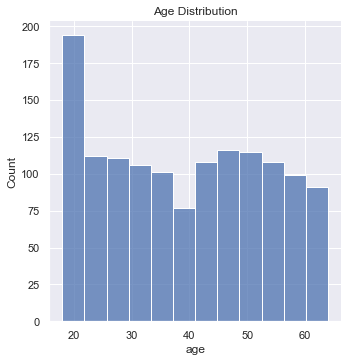

In [15]:
#distribution of age value
sns.set()
plt.figure(figsize=(7,7))
sns.displot(insurance_data['age'])
plt.title('Age Distribution')

Text(0.5, 1.0, 'Sex distribution')

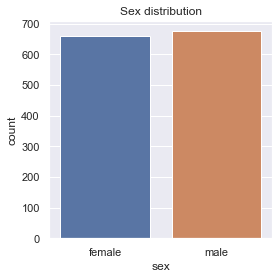

In [17]:
# distirbution of genger column
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_data)
plt.title('Sex distribution')

In [18]:
insurance_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'Bmi Distribution')

<Figure size 504x504 with 0 Axes>

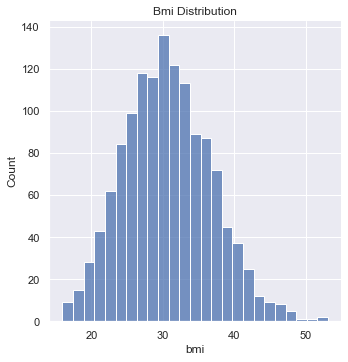

In [19]:
plt.figure(figsize=(7,7))
sns.displot(insurance_data['bmi'])
plt.title('Bmi Distribution')

Text(0.5, 1.0, 'Children')

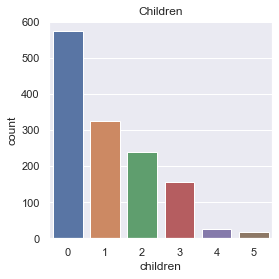

In [20]:
#Normal bmi range is 18.5 - 24.9   bodymassindex
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=insurance_data)
plt.title('Children')

In [22]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smokers')

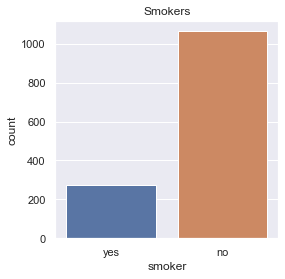

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smokers')

In [24]:
insurance_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'Region')

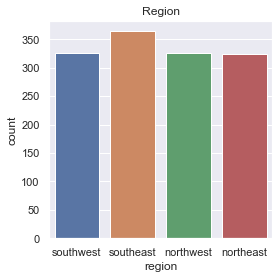

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')

In [26]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Charges')

<Figure size 504x504 with 0 Axes>

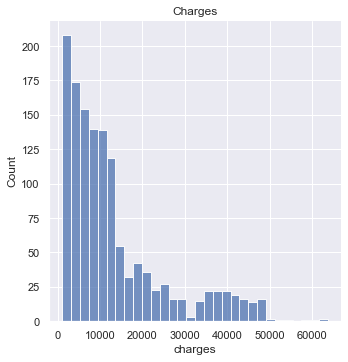

In [27]:
plt.figure(figsize=(7,7))
sns.displot(insurance_data['charges'])
plt.title('Charges')

# Data Preprocessing

In [28]:
#encoding the categorical features

insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [29]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,2,10600.5483
1334,18,1,31.92,0,1,3,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,2,29141.3603


In [30]:
data=insurance_data.drop(['charges'],axis=1)
label=insurance_data['charges']

In [31]:
data.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data,label,test_size=.2,random_state=2)

In [34]:
print(data.shape,X_test.shape,X_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [40]:
train_prediction = model.predict(X_train)
train_accuracy = metrics.r2_score(Y_train,train_prediction)
print(train_accuracy)

0.7518195459072954


In [41]:
test_prediction = model.predict(X_test)
test_accuracy = metrics.r2_score(Y_test,test_prediction)
print(test_accuracy)

0.7454471618659975


# Predictive System

In [45]:
input_data= (62,1,26.29,0,0,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predictor = model.predict(input_data_reshaped)
print('Insurance cost in $:',predictor[0])

#if predictor == 

Insurance cost in $: 35527.17567083342


C:\Users\hwale\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
